In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from yellowbrick.classifier import ClassPredictionError
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from yellowbrick.features.pca import PCADecomposition
from yellowbrick.features.manifold import Manifold
from sklearn.cluster import KMeans
from yellowbrick.classifier import ROCAUC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')



bladder_cancer_file = "/Users/sertan/Documents/DataScience_GT/TheProject/Bladder-Cancer-Detection/BladderC_data.txt"
df = pd.read_csv(bladder_cancer_file, delimiter="\t", header = None, low_memory=False) 





,10,11,12,13,14,35,36,37,38,39,...,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600
0,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,ID_REF,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,Sex: Male,age: 59,disease status: Bladder Cancer,pathological tstage: <pT2,pathological grade: low,GSM3106847,-1.061,-1.061,2.303,-1.061,...,-1.061,-1.061,7.743,-1.061,-1.061,6.507,3.906,-1.061,-1.061,-1.061
2,Sex: Female,age: 77,disease status: Bladder Cancer,pathological tstage: >=pT2,pathological grade: high,GSM3106848,0.765,0.765,4.920,0.765,...,0.765,0.765,8.038,0.765,0.765,5.946,0.765,0.765,0.765,0.765
3,Sex: Male,age: 50,disease status: Bladder Cancer,pathological tstage: <pT2,pathological grade: high,GSM3106849,2.949,3.451,0.420,2.594,...,-1.492,-1.492,7.596,-1.492,-1.492,6.058,4.482,2.917,-1.492,-1.492
4,Sex: Male,age: 76,disease status: Bladder Cancer,pathological tstage: <pT2,pathological grade: high,GSM3106850,3.033,6.224,3.496,4.870,...,2.870,0.867,7.526,0.867,0.867,6.315,2.759,5.028,0.867,4.042
5,Sex: Female,age: 81,disease status: Bladder Cancer,pathological tstage: <pT2,pathological grade: high,GSM3106851,4.832,5.349,5.571,6.055,...,6.457,1.237,7.388,5.724,1.237,6.788,6.695,5.987,1.237,5.985
6,Sex: Male,age: 54,disease status: Bladder Cancer,pathological tstage: <pT2,pathological grade: low,GSM3106852,1.729,4.569,3.458,3.035,...,5.186,-0.486,9.491,-0.486,-0.486,6.825,4.682,-0.486,-0.486,-0.486
7,Sex: Male,age: 74,disease status: Bladder Cancer,pathological tstage: <pT2,pathological grade: low,GSM3106853,6.330,6.452,3.505,1.510,...,1.510,1.510,8.169,1.510,1.510,5.517,1.510,4.643,1.510,1.510
8,Sex: Female,age: 76,disease status: Bladder Cancer,pathological tstage: <pT2,pathological grade: high,GSM3106854,6.835,1.320,4.226,6.162,...,1.320,3.980,8.404,5.749,1.320,6.913,4.670,1.320,1.320,1.320
9,Sex: Male,age: 58,disease status: Bladder Cancer,pathological tstage: <pT2,pathological grade: low,GSM3106855,0.195,4.343,1.969,0.195,...,0.195,0.195,7.219,0.195,0.195,6.598,6.062,3.480,2.795,0.195


,Gender,Age,Class,Path_Stage,Path_Grade,Sample_ID,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,Male,59,Bladder Cancer,<pT2,low,GSM3106847,-1.061,-1.061,2.303,-1.061,...,-1.061,-1.061,7.743,-1.061,-1.061,6.507,3.906,-1.061,-1.061,-1.061
2,Female,77,Bladder Cancer,>=pT2,high,GSM3106848,0.765,0.765,4.920,0.765,...,0.765,0.765,8.038,0.765,0.765,5.946,0.765,0.765,0.765,0.765
3,Male,50,Bladder Cancer,<pT2,high,GSM3106849,2.949,3.451,0.420,2.594,...,-1.492,-1.492,7.596,-1.492,-1.492,6.058,4.482,2.917,-1.492,-1.492
4,Male,76,Bladder Cancer,<pT2,high,GSM3106850,3.033,6.224,3.496,4.870,...,2.870,0.867,7.526,0.867,0.867,6.315,2.759,5.028,0.867,4.042
5,Female,81,Bladder Cancer,<pT2,high,GSM3106851,4.832,5.349,5.571,6.055,...,6.457,1.237,7.388,5.724,1.237,6.788,6.695,5.987,1.237,5.985
6,Male,54,Bladder Cancer,<pT2,low,GSM3106852,1.729,4.569,3.458,3.035,...,5.186,-0.486,9.491,-0.486,-0.486,6.825,4.682,-0.486,-0.486,-0.486
7,Male,74,Bladder Cancer,<pT2,low,GSM3106853,6.330,6.452,3.505,1.510,...,1.510,1.510,8.169,1.510,1.510,5.517,1.510,4.643,1.510,1.510
8,Female,76,Bladder Cancer,<pT2,high,GSM3106854,6.835,1.320,4.226,6.162,...,1.320,3.980,8.404,5.749,1.320,6.913,4.670,1.320,1.320,1.320
9,Male,58,Bladder Cancer,<pT2,low,GSM3106855,0.195,4.343,1.969,0.195,...,0.195,0.195,7.219,0.195,0.195,6.598,6.062,3.480,2.795,0.195
10,Female,65,Bladder Cancer,>=pT2,high,GSM3106856,2.491,0.882,0.801,0.801,...,0.801,0.801,6.498,0.801,0.801,6.438,0.801,0.801,2.912,3.758


,Gender,Age,Class,Path_Stage,Path_Grade,Sample_ID,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
968,Male,56,Sarcoma,uncertain,uncertain,GSM3107823,3.708,0.047,0.047,2.367,...,0.047,0.047,7.018,0.047,0.047,4.981,5.108,0.047,0.047,0.047
969,Male,30,Sarcoma,uncertain,uncertain,GSM3107824,0.132,5.036,2.702,3.014,...,0.132,4.692,7.139,3.550,0.132,6.421,5.440,2.879,0.132,1.333
970,Female,28,Sarcoma,uncertain,uncertain,GSM3107825,5.440,6.437,6.580,4.195,...,6.006,1.825,7.207,7.598,3.817,5.860,7.004,4.843,1.825,5.272
971,Male,60,Sarcoma,uncertain,uncertain,GSM3107826,0.071,4.577,5.210,3.543,...,0.071,0.071,7.237,0.071,0.071,4.031,0.071,6.098,0.071,0.071
972,Male,77,Sarcoma,uncertain,uncertain,GSM3107827,4.798,4.875,5.118,4.896,...,-1.124,3.719,8.208,4.938,-1.183,6.317,5.534,5.347,3.918,4.491


array(['Male', 'Female'], dtype=object)

array(['59', '77', '50', '76', '81', '54', '74', '58', '65', '71', '66',
       '80', '68', '61', '55', '69', '48', '72', '53', '86', '67', '60',
       '79', '57', '82', '41', '78', '63', '64', '83', '73', '39', '70',
       '35', '84', '44', '85', '62', '56', '42', '87', '52', '38', '93',
       '75', '47', '49', '51', '32', '90', '89', '40', '34', '43', '46',
       '37', '36', '92', '88', '45', '31', '26', '17', '24', '33', '30',
       '27', '29', '28'], dtype=object)

array(['Bladder Cancer', 'Non-cancer control', 'Breast Cancer',
       'Biliary Tract Cancer', 'Colorectal Cancer', 'Esophageal Cancer',
       'Gastric Cancer', 'Glioma', 'Hepatocellular Carcinoma',
       'Lung Cancer', 'Ovarian Cancer', 'Pancreatic Cancer',
       'Prostate Cancer', 'Sarcoma'], dtype=object)

array(['<pT2', '>=pT2', 'pathological grade: high', 'NA', 'uncertain'],
      dtype=object)

array(['low', 'high', nan, 'NA', 'uncertain'], dtype=object)

uncertain                   480
<pT2                        300
NA                          100
>=pT2                        90
pathological grade: high      2
Name: Path_Stage, dtype: int64

uncertain    480
high         313
NA           100
low           77
Name: Path_Grade, dtype: int64

uncertain    582
<pT2         300
>=pT2         90
Name: Path_Stage, dtype: int64

uncertain    582
high         313
low           77
Name: Path_Grade, dtype: int64

,Gender,Age,Class,Path_Stage,Path_Grade,Sample_ID,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,Male,59,Bladder Cancer,<pT2,low,GSM3106847,-1.061,-1.061,2.303,-1.061,...,-1.061,-1.061,7.743,-1.061,-1.061,6.507,3.906,-1.061,-1.061,-1.061
2,Female,77,Bladder Cancer,>=pT2,high,GSM3106848,0.765,0.765,4.920,0.765,...,0.765,0.765,8.038,0.765,0.765,5.946,0.765,0.765,0.765,0.765
3,Male,50,Bladder Cancer,<pT2,high,GSM3106849,2.949,3.451,0.420,2.594,...,-1.492,-1.492,7.596,-1.492,-1.492,6.058,4.482,2.917,-1.492,-1.492
4,Male,76,Bladder Cancer,<pT2,high,GSM3106850,3.033,6.224,3.496,4.870,...,2.870,0.867,7.526,0.867,0.867,6.315,2.759,5.028,0.867,4.042
5,Female,81,Bladder Cancer,<pT2,high,GSM3106851,4.832,5.349,5.571,6.055,...,6.457,1.237,7.388,5.724,1.237,6.788,6.695,5.987,1.237,5.985
6,Male,54,Bladder Cancer,<pT2,low,GSM3106852,1.729,4.569,3.458,3.035,...,5.186,-0.486,9.491,-0.486,-0.486,6.825,4.682,-0.486,-0.486,-0.486
7,Male,74,Bladder Cancer,<pT2,low,GSM3106853,6.330,6.452,3.505,1.510,...,1.510,1.510,8.169,1.510,1.510,5.517,1.510,4.643,1.510,1.510
8,Female,76,Bladder Cancer,<pT2,high,GSM3106854,6.835,1.320,4.226,6.162,...,1.320,3.980,8.404,5.749,1.320,6.913,4.670,1.320,1.320,1.320
9,Male,58,Bladder Cancer,<pT2,low,GSM3106855,0.195,4.343,1.969,0.195,...,0.195,0.195,7.219,0.195,0.195,6.598,6.062,3.480,2.795,0.195
10,Female,65,Bladder Cancer,>=pT2,high,GSM3106856,2.491,0.882,0.801,0.801,...,0.801,0.801,6.498,0.801,0.801,6.438,0.801,0.801,2.912,3.758


,Gender,Age,Class,Path_Stage,Path_Grade,Sample_ID,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,Male,59,1,<pT2,low,GSM3106847,-1.061,-1.061,2.303,-1.061,...,-1.061,-1.061,7.743,-1.061,-1.061,6.507,3.906,-1.061,-1.061,-1.061
2,Female,77,1,>=pT2,high,GSM3106848,0.765,0.765,4.920,0.765,...,0.765,0.765,8.038,0.765,0.765,5.946,0.765,0.765,0.765,0.765
3,Male,50,1,<pT2,high,GSM3106849,2.949,3.451,0.420,2.594,...,-1.492,-1.492,7.596,-1.492,-1.492,6.058,4.482,2.917,-1.492,-1.492
4,Male,76,1,<pT2,high,GSM3106850,3.033,6.224,3.496,4.870,...,2.870,0.867,7.526,0.867,0.867,6.315,2.759,5.028,0.867,4.042
5,Female,81,1,<pT2,high,GSM3106851,4.832,5.349,5.571,6.055,...,6.457,1.237,7.388,5.724,1.237,6.788,6.695,5.987,1.237,5.985
6,Male,54,1,<pT2,low,GSM3106852,1.729,4.569,3.458,3.035,...,5.186,-0.486,9.491,-0.486,-0.486,6.825,4.682,-0.486,-0.486,-0.486
7,Male,74,1,<pT2,low,GSM3106853,6.330,6.452,3.505,1.510,...,1.510,1.510,8.169,1.510,1.510,5.517,1.510,4.643,1.510,1.510
8,Female,76,1,<pT2,high,GSM3106854,6.835,1.320,4.226,6.162,...,1.320,3.980,8.404,5.749,1.320,6.913,4.670,1.320,1.320,1.320
9,Male,58,1,<pT2,low,GSM3106855,0.195,4.343,1.969,0.195,...,0.195,0.195,7.219,0.195,0.195,6.598,6.062,3.480,2.795,0.195
10,Female,65,1,>=pT2,high,GSM3106856,2.491,0.882,0.801,0.801,...,0.801,0.801,6.498,0.801,0.801,6.438,0.801,0.801,2.912,3.758


array([1, 0, 2])

,Class,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,1,-1.061,-1.061,2.303,-1.061,2.972,4.457,-1.061,-1.061,4.129,...,-1.061,-1.061,7.743,-1.061,-1.061,6.507,3.906,-1.061,-1.061,-1.061
2,1,0.765,0.765,4.920,0.765,0.765,0.765,0.765,0.765,0.765,...,0.765,0.765,8.038,0.765,0.765,5.946,0.765,0.765,0.765,0.765
3,1,2.949,3.451,0.420,2.594,1.034,-1.492,2.315,1.696,-1.492,...,-1.492,-1.492,7.596,-1.492,-1.492,6.058,4.482,2.917,-1.492,-1.492
4,1,3.033,6.224,3.496,4.870,3.977,0.867,6.365,0.867,1.800,...,2.870,0.867,7.526,0.867,0.867,6.315,2.759,5.028,0.867,4.042
5,1,4.832,5.349,5.571,6.055,1.237,1.237,4.042,4.588,4.127,...,6.457,1.237,7.388,5.724,1.237,6.788,6.695,5.987,1.237,5.985


array([1, 0, 2])

(972, 2566)

(972, 2565)

(972,)

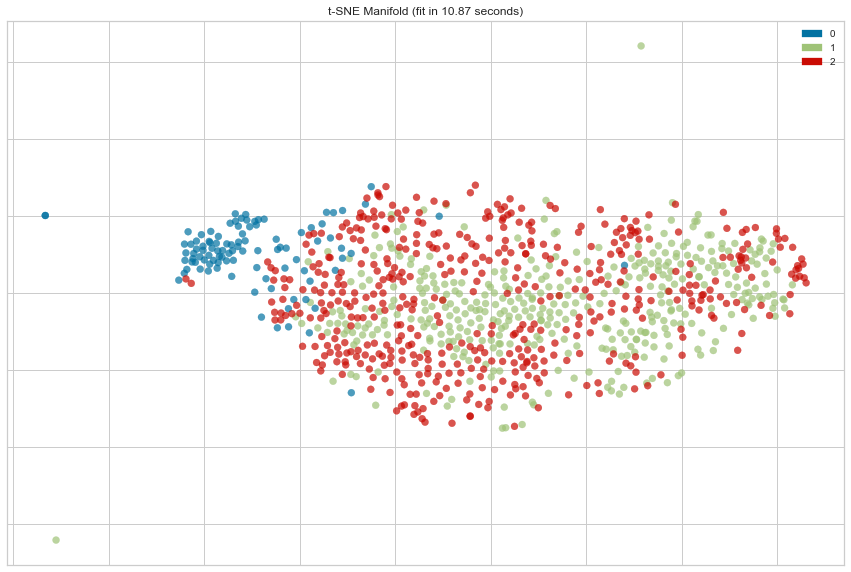

In [45]:
#######################
### Data Wrangling  ###
#######################

#Dropping soon to be columns from the dataset
df2 = df.drop([0,1,2,3,4,5,6,7,8,9,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34], axis=0) 
df3 = df2.T
df3 = df3.drop([2601], axis=1)
display(df3.head(10))

#Labeling and headers
df3.loc[0, 10] = 'Gender'
df3.loc[0, 11] = 'Age'
df3.loc[0, 12] = 'Class'
df3.loc[0, 13] = 'Path_Stage'
df3.loc[0, 14] = 'Path_Grade'
df3.loc[0, 35] = 'Sample_ID'
#df3.head(10)

new_header = df3.iloc[0] 
df4 = df3[1:] 
df4.columns = new_header 
#df4.head()

df4['Gender']     = df4['Gender'].str.replace('Sex: ', '')
df4['Age']        = df4['Age'].str.replace('age: ', '')
df4['Class']      = df4['Class'].str.replace('disease status: ', '')
df4['Path_Stage'] = df4['Path_Stage'].str.replace('pathological tstage: ', '')
df4['Path_Grade'] = df4['Path_Grade'].str.replace('pathological grade: ', '')
display(df4.head(10))
display(df4.tail())

### Data Wrangling 

#Looking at unique values of the columns
df5=df4
display(df5["Gender"].unique())
display(df5["Age"].unique())
display(df5["Class"].unique())
display(df5["Path_Stage"].unique())
display(df5["Path_Grade"].unique())
display(df5['Path_Stage'].value_counts())
display(df5['Path_Grade'].value_counts())

#Replacing missing and miss coded data, catagorizing them into "uncertain"
df6=df5
df6['Path_Stage']=df6['Path_Stage'].str.replace('pathological grade: high','uncertain')
df6['Path_Stage']=df6['Path_Stage'].str.replace('NA','uncertain')
df6['Path_Grade']=df6['Path_Grade'].str.replace('NA','uncertain')
df6['Path_Grade']=df6['Path_Grade'].fillna('uncertain')
display(df6['Path_Stage'].value_counts())
display(df6['Path_Grade'].value_counts())

### Data Wrangling 

#Dividing the group into 3
df7=df6
display(df7.head(10))
df7["Class"] = df7["Class"].map(lambda x: 1 if x=="Bladder Cancer" else (0 if x=="Non-cancer control" else 2))
display(df7.head(10))
display(df7["Class"].unique())

#Decided to drop them and encode Gender
cols = ["Path_Stage","Path_Grade","Sample_ID","Gender","Age"]
df8 = df7.drop(cols,axis=1)
#dum = ["Gender"]
#df8 = pd.get_dummies(df8, columns=dum)
display(df8.head())
display(df8["Class"].unique())

#Creating X and y, our independent and dependent variables. 
colsdrop=["Class"]
X = df8.drop(colsdrop,axis=1)
y = df8['Class']
display(df8.shape)
display(X.shape)
display(y.shape)
X.head()

#Take a loog at the data to see if any obvious distinction between groups
visualizer = Manifold(manifold='tsne', target='discrete', size=(1080, 720))
visualizer.fit_transform(X,y)
visualizer.poof()

In [46]:
#### Reading in the Test Data, GSE112264_series_matrix.txt, needs to be wrangled just like the origina one
#### This is everything I did above in one cell

bladder_cancer_test = "/Users/sertan/Documents/DataScience_GT/TheProject/Bladder-Cancer-Detection/BladderC_testdata.txt"
df_t = pd.read_csv(bladder_cancer_test, delimiter="\t", header = None, low_memory=False) 

display(df_t.head(40))
#display(df_t.tail(10))
#display(df_t.shape)


### Data Wrangling 
df_t2 = df_t.drop([0,1,2,3,4,5,6,7,8,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36], axis=0) 
df_t3 = df_t2.T
display(df_t3.head(10))
display(df_t3.shape)

df_t3 = df_t3.drop([2602], axis=1)
df_t3.loc[0, 10] = 'Gender'
df_t3.loc[0, 11] = 'Age'
df_t3.loc[0, 9] = 'Class'
df_t3.head(10)

display(df_t3.head(10))
new_header = df_t3.iloc[0]
display(new_header.shape)
df_t4 = df_t3[1:] 
display(df_t4.shape)
display(df_t4.head())
df_t4.columns = new_header 
display(df_t4.head())

df_t4['Gender']     = df_t4['Gender'].str.replace('Sex: ', '')
df_t4['Age']        = df_t4['Age'].str.replace('age: ', '')
df_t4['Class']      = df_t4['Class'].str.replace('disease state: ', '')


### Data Wrangling 

df_t5=df_t4
display(df_t5["Gender"].unique())
display(df_t5["Age"].unique())
display(df_t5["Class"].unique())

### Data Wrangling 

df_t7=df_t5
display(df_t7.head(10))           #before group assignment
df_t7["Class"] = df_t7["Class"].map(lambda x: 1 if x=="Bladder Cancer" else (0 if x=="non-Cancer" else 2))
display(df_t7.head(10))
display(df_t7["Class"].unique())  #after assignment

cols = ["Gender","Age"]
df_t8 = df_t7.drop(cols,axis=1)


#Splitting into X and y test data
colsdrop=["Class"]
X_testd = df_t8.drop(colsdrop,axis=1)
y_testd = df_t8['Class']
display(df_t8.shape)
display(X_testd.shape)
display(y_testd.shape)
display(X_testd.head())
display(y_testd.unique())





,0,1,2,3,4,5,6,7,8,9,...,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591
0,!Sample_title,BT0010 Biliary Tract Cancer,BT0022 Biliary Tract Cancer,BT0043 Biliary Tract Cancer,BT0050 Biliary Tract Cancer,BT0071 Biliary Tract Cancer,BT0075 Biliary Tract Cancer,BT0091 Biliary Tract Cancer,BT0100 Biliary Tract Cancer,BT0105 Biliary Tract Cancer,...,SA0868 Sarcoma,SA0878 Sarcoma,SA0887 Sarcoma,SA0922 Sarcoma,SA0923 Sarcoma,SA0944 Sarcoma,SA0967 Sarcoma,SA0976 Sarcoma,SA0981 Sarcoma,SA1001 Sarcoma
1,!Sample_geo_accession,GSM3063093,GSM3063094,GSM3063095,GSM3063096,GSM3063097,GSM3063098,GSM3063099,GSM3063100,GSM3063101,...,GSM3064674,GSM3064675,GSM3064676,GSM3064677,GSM3064678,GSM3064679,GSM3064680,GSM3064681,GSM3064682,GSM3064683
2,!Sample_status,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,...,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019,Public on Mar 01 2019
3,!Sample_submission_date,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,...,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018,Mar 23 2018
4,!Sample_last_update_date,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,...,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019,Mar 01 2019
5,!Sample_type,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,...,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA,RNA
6,!Sample_channel_count,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,!Sample_source_name_ch1,serum,serum,serum,serum,serum,serum,serum,serum,serum,...,serum,serum,serum,serum,serum,serum,serum,serum,serum,serum
8,!Sample_organism_ch1,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,...,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens
9,!Sample_characteristics_ch1,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,...,disease state: Sarcoma,disease state: Sarcoma,disease state: Sarcoma,disease state: Sarcoma,disease state: Sarcoma,disease state: Sarcoma,disease state: Sarcoma,disease state: Sarcoma,disease state: Sarcoma,disease state: Sarcoma


,9,10,11,37,38,39,40,41,42,43,...,2593,2594,2595,2596,2597,2598,2599,2600,2601,2602
0,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,...,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704,!series_matrix_table_end
1,disease state: Biliary Tract Cancer,Sex: Male,age: 58,-0.297,-0.297,-0.297,3.977,-0.297,-0.297,-0.297,...,-0.297,6.933,-0.297,-0.297,3.489,5.389,-0.297,-0.297,-0.297,NaN
2,disease state: Biliary Tract Cancer,Sex: Male,age: 59,1.030,3.489,-0.838,4.832,3.161,4.417,-0.838,...,-0.838,9.255,4.411,-0.838,6.380,5.964,4.810,-0.838,3.180,NaN
3,disease state: Biliary Tract Cancer,Sex: Male,age: 66,4.599,-0.292,3.997,2.016,4.105,-0.292,3.576,...,-0.292,7.649,-0.292,-0.292,6.242,2.263,2.526,-0.292,-0.292,NaN
4,disease state: Biliary Tract Cancer,Sex: Male,age: 63,4.669,3.523,6.537,5.673,-0.529,-0.529,2.037,...,3.310,7.496,3.481,-0.529,5.870,5.845,3.527,-0.529,-0.529,NaN
5,disease state: Biliary Tract Cancer,Sex: Male,age: 60,3.339,4.485,3.153,3.787,4.690,5.016,0.314,...,0.314,9.131,3.884,0.314,7.778,5.286,3.961,0.314,0.314,NaN
6,disease state: Biliary Tract Cancer,Sex: Male,age: 61,5.468,4.624,3.860,4.479,5.285,4.826,4.506,...,3.884,6.965,-0.886,-0.291,6.192,5.726,5.045,-0.886,2.826,NaN
7,disease state: Biliary Tract Cancer,Sex: Male,age: 71,0.271,3.721,0.288,1.755,2.681,-1.274,-1.274,...,-1.274,7.599,-1.274,-1.274,5.851,4.112,4.551,2.854,-0.067,NaN
8,disease state: Biliary Tract Cancer,Sex: Male,age: 72,0.073,4.184,-0.603,0.748,-0.603,2.589,3.536,...,3.363,7.905,3.642,-0.603,7.558,3.727,5.644,2.995,-0.603,NaN
9,disease state: Biliary Tract Cancer,Sex: Male,age: 59,6.140,4.444,5.688,3.984,6.981,7.069,4.381,...,4.041,7.051,0.215,0.215,6.155,5.359,5.575,3.598,0.215,NaN


(1592, 2569)

,9,10,11,37,38,39,40,41,42,43,...,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601
0,Class,Gender,Age,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,disease state: Biliary Tract Cancer,Sex: Male,age: 58,-0.297,-0.297,-0.297,3.977,-0.297,-0.297,-0.297,...,-0.297,-0.297,6.933,-0.297,-0.297,3.489,5.389,-0.297,-0.297,-0.297
2,disease state: Biliary Tract Cancer,Sex: Male,age: 59,1.030,3.489,-0.838,4.832,3.161,4.417,-0.838,...,2.830,-0.838,9.255,4.411,-0.838,6.380,5.964,4.810,-0.838,3.180
3,disease state: Biliary Tract Cancer,Sex: Male,age: 66,4.599,-0.292,3.997,2.016,4.105,-0.292,3.576,...,-0.292,-0.292,7.649,-0.292,-0.292,6.242,2.263,2.526,-0.292,-0.292
4,disease state: Biliary Tract Cancer,Sex: Male,age: 63,4.669,3.523,6.537,5.673,-0.529,-0.529,2.037,...,5.067,3.310,7.496,3.481,-0.529,5.870,5.845,3.527,-0.529,-0.529
5,disease state: Biliary Tract Cancer,Sex: Male,age: 60,3.339,4.485,3.153,3.787,4.690,5.016,0.314,...,0.314,0.314,9.131,3.884,0.314,7.778,5.286,3.961,0.314,0.314
6,disease state: Biliary Tract Cancer,Sex: Male,age: 61,5.468,4.624,3.860,4.479,5.285,4.826,4.506,...,4.021,3.884,6.965,-0.886,-0.291,6.192,5.726,5.045,-0.886,2.826
7,disease state: Biliary Tract Cancer,Sex: Male,age: 71,0.271,3.721,0.288,1.755,2.681,-1.274,-1.274,...,-1.274,-1.274,7.599,-1.274,-1.274,5.851,4.112,4.551,2.854,-0.067
8,disease state: Biliary Tract Cancer,Sex: Male,age: 72,0.073,4.184,-0.603,0.748,-0.603,2.589,3.536,...,2.970,3.363,7.905,3.642,-0.603,7.558,3.727,5.644,2.995,-0.603
9,disease state: Biliary Tract Cancer,Sex: Male,age: 59,6.140,4.444,5.688,3.984,6.981,7.069,4.381,...,2.454,4.041,7.051,0.215,0.215,6.155,5.359,5.575,3.598,0.215


(2568,)

(1591, 2568)

,9,10,11,37,38,39,40,41,42,43,...,2592,2593,2594,2595,2596,2597,2598,2599,2600,2601
1,disease state: Biliary Tract Cancer,Sex: Male,age: 58,-0.297,-0.297,-0.297,3.977,-0.297,-0.297,-0.297,...,-0.297,-0.297,6.933,-0.297,-0.297,3.489,5.389,-0.297,-0.297,-0.297
2,disease state: Biliary Tract Cancer,Sex: Male,age: 59,1.030,3.489,-0.838,4.832,3.161,4.417,-0.838,...,2.830,-0.838,9.255,4.411,-0.838,6.380,5.964,4.810,-0.838,3.180
3,disease state: Biliary Tract Cancer,Sex: Male,age: 66,4.599,-0.292,3.997,2.016,4.105,-0.292,3.576,...,-0.292,-0.292,7.649,-0.292,-0.292,6.242,2.263,2.526,-0.292,-0.292
4,disease state: Biliary Tract Cancer,Sex: Male,age: 63,4.669,3.523,6.537,5.673,-0.529,-0.529,2.037,...,5.067,3.310,7.496,3.481,-0.529,5.870,5.845,3.527,-0.529,-0.529
5,disease state: Biliary Tract Cancer,Sex: Male,age: 60,3.339,4.485,3.153,3.787,4.690,5.016,0.314,...,0.314,0.314,9.131,3.884,0.314,7.778,5.286,3.961,0.314,0.314


,Class,Gender,Age,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,disease state: Biliary Tract Cancer,Sex: Male,age: 58,-0.297,-0.297,-0.297,3.977,-0.297,-0.297,-0.297,...,-0.297,-0.297,6.933,-0.297,-0.297,3.489,5.389,-0.297,-0.297,-0.297
2,disease state: Biliary Tract Cancer,Sex: Male,age: 59,1.030,3.489,-0.838,4.832,3.161,4.417,-0.838,...,2.830,-0.838,9.255,4.411,-0.838,6.380,5.964,4.810,-0.838,3.180
3,disease state: Biliary Tract Cancer,Sex: Male,age: 66,4.599,-0.292,3.997,2.016,4.105,-0.292,3.576,...,-0.292,-0.292,7.649,-0.292,-0.292,6.242,2.263,2.526,-0.292,-0.292
4,disease state: Biliary Tract Cancer,Sex: Male,age: 63,4.669,3.523,6.537,5.673,-0.529,-0.529,2.037,...,5.067,3.310,7.496,3.481,-0.529,5.870,5.845,3.527,-0.529,-0.529
5,disease state: Biliary Tract Cancer,Sex: Male,age: 60,3.339,4.485,3.153,3.787,4.690,5.016,0.314,...,0.314,0.314,9.131,3.884,0.314,7.778,5.286,3.961,0.314,0.314


array(['Male'], dtype=object)

array(['58', '59', '66', '63', '60', '61', '71', '72', '62', '76', '70',
       '68', '77', '69', '74', '42', '26', '64', '43', '80', '67', '65',
       '86', '53', '57', '41', '81', '35', '44', '56', '82', '73', '78',
       '50', '54', '40', '75', '55', '83', '79', '48', '46', '36', '87',
       '52', '17', '31', '25', '49', '84', '45', '33', '29', '24', '10',
       '39', '51', '47', '85', '92', '93', '37', '38', '88', '20', '22',
       '30'], dtype=object)

array(['Biliary Tract Cancer', 'Bladder Cancer', 'Colorectal Cancer',
       'Esophageal Cancer', 'Gastric Cancer', 'Glioma',
       'Hepatocellular Carcinoma', 'Lung Cancer',
       'Negative prostate biopsy', 'non-Cancer', 'Pancreatic Cancer',
       'Prostate Cancer', 'Sarcoma'], dtype=object)

,Class,Gender,Age,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,Biliary Tract Cancer,Male,58,-0.297,-0.297,-0.297,3.977,-0.297,-0.297,-0.297,...,-0.297,-0.297,6.933,-0.297,-0.297,3.489,5.389,-0.297,-0.297,-0.297
2,Biliary Tract Cancer,Male,59,1.030,3.489,-0.838,4.832,3.161,4.417,-0.838,...,2.830,-0.838,9.255,4.411,-0.838,6.380,5.964,4.810,-0.838,3.180
3,Biliary Tract Cancer,Male,66,4.599,-0.292,3.997,2.016,4.105,-0.292,3.576,...,-0.292,-0.292,7.649,-0.292,-0.292,6.242,2.263,2.526,-0.292,-0.292
4,Biliary Tract Cancer,Male,63,4.669,3.523,6.537,5.673,-0.529,-0.529,2.037,...,5.067,3.310,7.496,3.481,-0.529,5.870,5.845,3.527,-0.529,-0.529
5,Biliary Tract Cancer,Male,60,3.339,4.485,3.153,3.787,4.690,5.016,0.314,...,0.314,0.314,9.131,3.884,0.314,7.778,5.286,3.961,0.314,0.314
6,Biliary Tract Cancer,Male,61,5.468,4.624,3.860,4.479,5.285,4.826,4.506,...,4.021,3.884,6.965,-0.886,-0.291,6.192,5.726,5.045,-0.886,2.826
7,Biliary Tract Cancer,Male,71,0.271,3.721,0.288,1.755,2.681,-1.274,-1.274,...,-1.274,-1.274,7.599,-1.274,-1.274,5.851,4.112,4.551,2.854,-0.067
8,Biliary Tract Cancer,Male,72,0.073,4.184,-0.603,0.748,-0.603,2.589,3.536,...,2.970,3.363,7.905,3.642,-0.603,7.558,3.727,5.644,2.995,-0.603
9,Biliary Tract Cancer,Male,59,6.140,4.444,5.688,3.984,6.981,7.069,4.381,...,2.454,4.041,7.051,0.215,0.215,6.155,5.359,5.575,3.598,0.215
10,Biliary Tract Cancer,Male,62,5.112,0.576,4.793,0.576,0.576,0.576,4.271,...,0.576,0.576,6.902,1.598,4.160,5.382,5.285,6.403,0.576,2.556


,Class,Gender,Age,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,2,Male,58,-0.297,-0.297,-0.297,3.977,-0.297,-0.297,-0.297,...,-0.297,-0.297,6.933,-0.297,-0.297,3.489,5.389,-0.297,-0.297,-0.297
2,2,Male,59,1.030,3.489,-0.838,4.832,3.161,4.417,-0.838,...,2.830,-0.838,9.255,4.411,-0.838,6.380,5.964,4.810,-0.838,3.180
3,2,Male,66,4.599,-0.292,3.997,2.016,4.105,-0.292,3.576,...,-0.292,-0.292,7.649,-0.292,-0.292,6.242,2.263,2.526,-0.292,-0.292
4,2,Male,63,4.669,3.523,6.537,5.673,-0.529,-0.529,2.037,...,5.067,3.310,7.496,3.481,-0.529,5.870,5.845,3.527,-0.529,-0.529
5,2,Male,60,3.339,4.485,3.153,3.787,4.690,5.016,0.314,...,0.314,0.314,9.131,3.884,0.314,7.778,5.286,3.961,0.314,0.314
6,2,Male,61,5.468,4.624,3.860,4.479,5.285,4.826,4.506,...,4.021,3.884,6.965,-0.886,-0.291,6.192,5.726,5.045,-0.886,2.826
7,2,Male,71,0.271,3.721,0.288,1.755,2.681,-1.274,-1.274,...,-1.274,-1.274,7.599,-1.274,-1.274,5.851,4.112,4.551,2.854,-0.067
8,2,Male,72,0.073,4.184,-0.603,0.748,-0.603,2.589,3.536,...,2.970,3.363,7.905,3.642,-0.603,7.558,3.727,5.644,2.995,-0.603
9,2,Male,59,6.140,4.444,5.688,3.984,6.981,7.069,4.381,...,2.454,4.041,7.051,0.215,0.215,6.155,5.359,5.575,3.598,0.215
10,2,Male,62,5.112,0.576,4.793,0.576,0.576,0.576,4.271,...,0.576,0.576,6.902,1.598,4.160,5.382,5.285,6.403,0.576,2.556


array([2, 1, 0])

(1591, 2566)

(1591, 2565)

(1591,)

,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070,MIMAT0000071,...,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,-0.297,-0.297,-0.297,3.977,-0.297,-0.297,-0.297,4.513,2.658,5.916,...,-0.297,-0.297,6.933,-0.297,-0.297,3.489,5.389,-0.297,-0.297,-0.297
2,1.030,3.489,-0.838,4.832,3.161,4.417,-0.838,5.169,3.213,4.957,...,2.830,-0.838,9.255,4.411,-0.838,6.380,5.964,4.810,-0.838,3.180
3,4.599,-0.292,3.997,2.016,4.105,-0.292,3.576,4.711,-0.292,5.955,...,-0.292,-0.292,7.649,-0.292,-0.292,6.242,2.263,2.526,-0.292,-0.292
4,4.669,3.523,6.537,5.673,-0.529,-0.529,2.037,5.561,3.852,3.656,...,5.067,3.310,7.496,3.481,-0.529,5.870,5.845,3.527,-0.529,-0.529
5,3.339,4.485,3.153,3.787,4.690,5.016,0.314,5.950,0.314,6.770,...,0.314,0.314,9.131,3.884,0.314,7.778,5.286,3.961,0.314,0.314


array([2, 1, 0])

In [47]:
############################################################
### Splitting Data into Test and Train and Standarizing it #
############################################################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=2, stratify=y)


# Standardizing the features
 #https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

ssc = StandardScaler()
X_std_tr = ssc.fit_transform(X_train)
X_std_te = ssc.transform(X_test)
X_std_td = ssc.transform(X_testd)

display(X_std_td.shape)
display(X_std_tr.shape)
display(X_train.iloc[:4,:10])    ## Before standardizing
display(X_std_tr[1,:])           ## After
display(X_std_td[1,:])           ## After



(1591, 2565)

(680, 2565)

,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070,MIMAT0000071
31,1.289,1.289,5.646,6.473,1.289,1.289,1.289,1.289,4.609,7.737
252,4.900,5.834,5.018,5.708,3.669,6.014,-0.158,4.887,4.363,7.220
319,0.243,0.243,0.243,4.820,0.243,3.943,1.708,3.566,4.420,6.936
13,5.898,1.468,1.468,1.468,1.468,1.468,4.948,1.468,6.429,7.809


array([0.77402209, 1.041428  , 0.88843767, ..., 0.3872564 , 1.52928354,
       1.83535658])

array([-0.60953655,  0.14819366, -1.15600236, ...,  0.99226225,
       -0.60951732,  0.94616646])

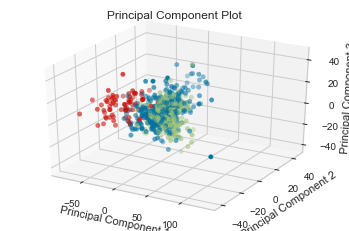

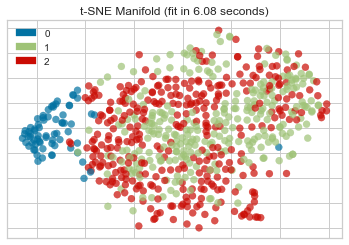

In [51]:
### Feature Visualization and Analysis

LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'g',
                   2 : 'b'}

label_color = [LABEL_COLOR_MAP[l] for l in y_train]

visualizer = PCADecomposition(scale=True, color=label_color, proj_dim=3)
visualizer.fit(X_std_tr, y_train)
visualizer.transform(X_std_tr)
visualizer.poof()


from yellowbrick.features.manifold import Manifold

visualizer = Manifold(manifold='tsne', target='discrete')
visualizer.fit_transform(X_std_tr,y_train)
visualizer.poof()

497

(680, 497)

(1591, 497)

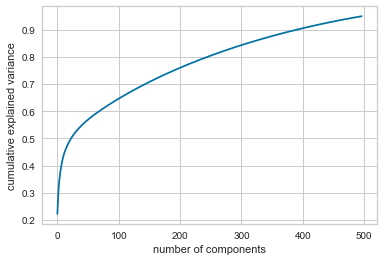

In [143]:
##################################################################
#### Choose one of the dimention reduction methods and run it    #
#     i) PCA (run this cell)                                     #
#    ii) Single Value Decomposition(run next cell)               #
#   iii) Random Forrest Regressor (run the correspoding cell)    #
#    iv) Random Forest and Recursive Feature Elimination (RFE)   #
#If you run this cell then skip the next reduction methods       #
#and continue running from Logistic regression, where it says
# "Now that dimention is reduced try different models"
###################################################################

### i) Dimention Reduxtion with PCA

#Keeping X% of the variation while reducing dimentions. 
#Lower the variation the lower the dimentions.

pca = PCA(.95)
pca.fit(X_std_tr)
X_pc_tr = pca.transform(X_std_tr)
X_pc_te = pca.transform(X_std_te)
X_pc_td = pca.transform(X_std_td)

import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

display(pca.n_components_)
display(X_pc_tr.shape)
display(X_pc_td.shape)



In [157]:
### ii) Dimention Reduction with Single Value Decomposition
 #The highest silhoutte score for 3 clusters is around 22 features, n_components=22.

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=22, random_state=42)

X_svd_tr = svd.fit_transform(X_train)
X_svd_te = svd.transform(X_test)
X_svd_td = svd.transform(X_testd)

print(svd.explained_variance_ratio_.sum())
print(X_svd_tr.shape)
print(X_svd_te.shape)
print(X_svd_te.shape)
print(type(X_svd_tr))
print(type(X_svd_te))
X_svd_tr2 = pd.DataFrame(X_svd_tr)
X_svd_te2 = pd.DataFrame(X_svd_te)
X_svd_td2 = pd.DataFrame(X_svd_td)
print(type(X_svd_tr2))
print(type(X_svd_te2))
print(type(X_svd_td2))
X_pc_tr = X_svd_tr2
X_pc_te = X_svd_te2
X_pc_td = X_svd_td2
display(X_svd_tr2.head())
display(X_svd_td2.head())

0.48694802896517053
(680, 22)
(292, 22)
(292, 22)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,222.693290,56.763593,10.248988,13.389907,9.280467,-16.512268,10.928443,3.522539,-13.934012,8.503424,...,-6.220287,2.524188,4.360746,4.379064,-9.255282,1.259727,-0.571027,-5.990811,-9.883980,6.926967
1,213.607751,19.719812,-35.484500,10.950935,-12.643282,-7.782882,-7.672928,-9.095184,4.315785,3.090804,...,4.927588,9.816494,4.542018,-10.025471,-5.737284,-6.742951,2.976000,-8.963495,4.735523,-2.660563
2,197.591959,5.149222,2.498489,-11.666297,-11.989421,3.865882,0.436642,0.264027,1.810120,-4.322430,...,-9.728205,4.659942,11.941673,-6.441570,-6.088197,-2.749304,-1.205547,2.872035,-2.513114,-4.974128
3,242.052144,86.773728,49.834957,9.607478,-2.579763,-8.858015,-3.325449,6.258387,4.524550,-0.205983,...,14.414546,-6.696452,-2.501231,-6.013999,-6.472781,11.062461,1.910173,-2.887088,-7.613560,-0.740900
4,188.084079,-30.099758,-25.896052,-14.509692,-16.442327,18.077454,-28.244855,-17.048854,0.442587,-5.854872,...,7.283482,-1.069634,1.546037,7.045101,-3.410457,-5.859869,-5.753110,-0.801934,3.354599,-1.224755


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,159.434540,-36.159065,-16.894543,-31.660251,2.669774,7.246845,5.927188,21.987179,-3.531562,13.287381,...,-8.798912,3.920771,-3.511692,-9.337696,-1.353083,-3.592546,14.105615,-4.050702,-0.552660,1.958960
1,210.667933,-11.176324,-12.931908,30.792880,-4.822190,14.956791,4.304510,2.762106,1.111235,-13.560576,...,-5.963820,2.472136,16.501127,-0.850148,1.529853,3.646323,-2.088236,3.154260,-2.388572,-5.883365
2,189.925319,-5.211679,42.233007,-23.158774,2.590865,5.905905,0.441499,-1.013603,0.734927,-12.044033,...,-7.018224,1.112194,9.649990,-4.767048,-2.067557,-1.127607,-2.353668,1.552878,-4.468153,-5.560158
3,187.215735,-19.456655,-34.917223,2.213305,12.058711,22.706929,-6.087448,7.044804,-7.457580,-13.271153,...,-1.533818,6.040745,-0.602867,-4.399912,-4.080801,-0.797888,4.914614,-8.938955,-2.100266,-4.079398
4,208.304300,8.594375,15.256285,0.101568,-4.633403,2.912307,-0.787610,0.671195,-1.648370,1.778209,...,-7.568696,-3.177559,1.296164,-4.760531,1.876814,4.262133,7.608273,1.834793,-1.516330,-3.734399


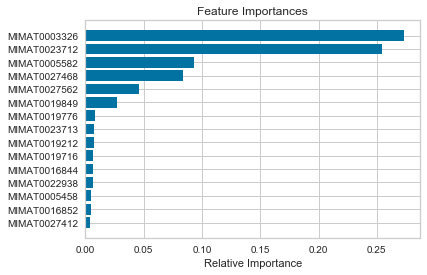

,MIMAT0003326,MIMAT0023712,MIMAT0005582,MIMAT0027468,MIMAT0027562,MIMAT0019849
31,11.723,11.241,10.415,10.596,4.740,7.443
252,11.984,11.041,10.755,10.902,6.371,7.068
319,11.283,11.721,11.142,10.962,6.483,7.848
13,12.687,11.478,10.833,10.964,7.194,7.544
829,11.560,12.039,11.052,11.836,4.715,7.258


,MIMAT0003326,MIMAT0023712,MIMAT0005582,MIMAT0027468,MIMAT0027562,MIMAT0019849
541,13.139,12.358,11.084,11.484,4.590,7.725
369,12.021,11.649,10.705,10.572,7.530,8.220
496,12.272,11.945,10.682,11.200,2.793,7.409
234,12.697,11.760,10.633,11.621,5.604,6.813
435,10.433,12.019,11.772,12.308,5.695,7.802


,MIMAT0003326,MIMAT0023712,MIMAT0005582,MIMAT0027468,MIMAT0027562,MIMAT0019849
1,12.860,12.724,10.919,11.483,-0.297,7.499
2,13.778,12.755,11.095,11.263,6.047,8.388
3,12.690,12.520,11.073,10.977,4.763,7.530
4,12.679,12.607,11.082,11.361,2.812,7.118
5,13.475,12.497,10.947,10.914,5.286,7.798


In [48]:
### iii) Dimention Reductoin with Random Forest Regressor
 #Keeps the original features
    
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train,y_train)

features = X_train.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)[-15:]  # top 16 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#Selecting the top features
imp_fet = ['MIMAT0003326','MIMAT0023712','MIMAT0005582','MIMAT0027468','MIMAT0027562',
           'MIMAT0019849']#,'MIMAT0019776','MIMAT0023713','MIMAT0019212','MIMAT0019716']
           #,'MIMAT0016844','MIMAT0022938','MIMAT0005458','MIMAT0016852','MIMAT0027412']

X_pc_tr = X_train[imp_fet]
X_pc_te = X_test[imp_fet]
X_pc_td = X_testd[imp_fet]

display(X_pc_tr.iloc[:5,-10:])
display(X_pc_te.iloc[:5,-10:])
display(X_pc_td.iloc[:5,-10:])

376

Index(['MIMAT0000064', 'MIMAT0000067', 'MIMAT0000077', 'MIMAT0000088',
       'MIMAT0000102', 'MIMAT0000222', 'MIMAT0000278', 'MIMAT0000418',
       'MIMAT0000420', 'MIMAT0000421',
       ...
       'MIMAT0030426', 'MIMAT0030991', 'MIMAT0030992', 'MIMAT0030996',
       'MIMAT0030999', 'MIMAT0031004', 'MIMAT0031015', 'MIMAT0031119',
       'MIMAT0031179', 'MIMAT0031180'],
      dtype='object', name=0, length=376)


,MIMAT0030426,MIMAT0030991,MIMAT0030992,MIMAT0030996,MIMAT0030999,MIMAT0031004,MIMAT0031015,MIMAT0031119,MIMAT0031179,MIMAT0031180
31,4.011,6.286,1.289,11.670,12.526,1.289,4.512,1.289,6.060,9.893
252,5.354,5.779,1.260,11.821,12.645,-0.158,-0.158,5.502,-0.158,10.465
319,5.997,3.520,0.243,12.357,12.920,1.068,3.381,6.513,0.243,9.930
13,5.090,5.306,5.986,12.599,13.292,1.468,6.106,6.307,5.263,10.626
829,4.963,2.651,-1.411,11.734,12.280,-1.411,-1.411,6.597,3.021,8.578


,MIMAT0030426,MIMAT0030991,MIMAT0030992,MIMAT0030996,MIMAT0030999,MIMAT0031004,MIMAT0031015,MIMAT0031119,MIMAT0031179,MIMAT0031180
541,5.031,5.095,-1.262,12.095,13.267,-1.262,-1.262,5.250,-1.262,10.632
369,2.382,1.307,1.307,11.654,12.921,1.307,3.638,1.307,1.307,10.552
496,6.320,0.658,0.658,12.449,13.204,0.658,4.474,0.658,6.444,9.847
234,5.366,3.547,-1.286,12.209,12.872,3.809,1.198,6.671,3.809,10.082
435,5.416,4.809,-2.413,13.095,12.800,4.125,-2.413,5.147,3.281,8.248


188
(376,)
(376,)


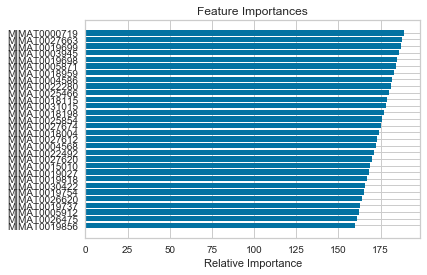

,MIMAT0015010,MIMAT0019027,MIMAT0019818,MIMAT0030422,MIMAT0019754,MIMAT0026620,MIMAT0019737,MIMAT0005912,MIMAT0026475,MIMAT0019856
31,7.620,10.193,1.289,7.524,1.289,1.289,1.289241012,1.289,5.402,1.289
252,7.214,10.851,-0.158,7.198,-0.158,5.496,6.785233693,4.784,6.505,-0.158
319,7.623,10.707,0.243,7.890,0.243,4.235,5.962705911,0.878,5.691,3.195
13,5.885,11.068,6.204,7.473,1.468,6.084,6.266869114,1.468,7.157,1.468
829,7.546,10.110,-1.411,6.560,-1.411,1.102,5.018394395,2.842,5.729,4.000


,MIMAT0015010,MIMAT0019027,MIMAT0019818,MIMAT0030422,MIMAT0019754,MIMAT0026620,MIMAT0019737,MIMAT0005912,MIMAT0026475,MIMAT0019856
541,8.349,10.557,-1.262,6.693,-1.262,1.386,4.661528902,3.484,5.850,-1.262
369,8.379,10.511,1.307,8.325,1.307,1.307,5.515106136,6.093,6.634,1.307
496,8.273,10.687,6.091,7.453,0.658,0.658,2.700511146,0.658,6.664,0.658
234,7.286,10.958,-1.286,6.963,0.981,3.344,5.826702007,2.397,5.896,1.960
435,8.003,10.405,1.991,7.377,-2.413,2.868,4.676993982,-2.413,5.466,4.146


,MIMAT0015010,MIMAT0019027,MIMAT0019818,MIMAT0030422,MIMAT0019754,MIMAT0026620,MIMAT0019737,MIMAT0005912,MIMAT0026475,MIMAT0019856
1,7.870,11.123,-0.297,6.135,-0.297,-0.297,5.015,-0.297,4.957,1.854
2,8.622,11.308,-0.838,7.447,-0.838,4.785,5.714,-0.838,5.837,5.075
3,7.624,11.128,5.013,7.328,-0.292,0.565,4.46,-0.292,2.547,-0.292
4,7.462,11.163,-0.529,6.420,-0.529,5.037,5.31,0.979,5.689,-0.529
5,7.981,11.742,2.716,7.746,5.294,3.644,5.986,0.314,6.168,3.338


In [10]:
### iv) Dimention Reduction with Random Forest and Recursive Feature Elimination (RFE)

rf2 = SelectFromModel(RandomForestClassifier(random_state=1))
rf2.fit(X_train,y_train)
selected_feat = X_train.columns[(rf2.get_support())]
X_rf_tr = X_train[selected_feat]
X_rf_te = X_test[selected_feat] 

display(len(selected_feat))
print(selected_feat)

display(X_rf_tr.iloc[:5,-10:])
display(X_rf_te.iloc[:5,-10:])

## RFE ###
##########
 #Afetr Random Forest above reduced it down to below 400 features
 #I wanted to get the most important among those using regisression

from sklearn import linear_model
from sklearn.feature_selection import RFE

logr  = LogisticRegression()
rfe   = RFE(logr)
rfe.fit(X_rf_tr,y_train)

print(rfe.n_features_)
print(rfe.support_.shape)
print(rfe.ranking_.shape)
#print(rfe.score(d,y_test))

features2 = X_rf_tr.columns
importances2 = rfe.ranking_
indices2 = np.argsort(importances2)[-30:]  # top 16 features
plt.title('Feature Importances')
plt.barh(range(len(indices2)), importances2[indices2], color='b', align='center')
plt.yticks(range(len(indices2)), [features2[i] for i in indices2])
plt.xlabel('Relative Importance')
plt.show()

imp_fet = ['MIMAT0000719','MIMAT0027663','MIMAT0019699','MIMAT0003945','MIMAT0019698',
           'MIMAT0005871','MIMAT0018959','MIMAT0004586','MIMAT0022280','MIMAT0025466',
           'MIMAT0018115','MIMAT0031015','MIMAT0018198','MIMAT0025854','MIMAT0027674',
           'MIMAT0018004','MIMAT0027612','MIMAT0004568','MIMAT0022492','MIMAT0027620',
           'MIMAT0015010','MIMAT0019027','MIMAT0019818','MIMAT0030422','MIMAT0019754',
           'MIMAT0026620','MIMAT0019737','MIMAT0005912','MIMAT0026475','MIMAT0019856']

X_pc_tr = X_train[imp_fet]
X_pc_te = X_test[imp_fet]
X_pc_td = X_testd[imp_fet]

display(X_pc_tr.iloc[:5,-10:])
display(X_pc_te.iloc[:5,-10:])
display(X_pc_td.iloc[:5,-10:])


In [49]:
#######################################################
### Now that dimention is reduced try different models#
#######################################################

#1) Supervised Learning

## A) Logistic Regresssion 

  ## check some of the assuptions like, the independent variables should be independent of each other. 
  ## That is, the model should have little or no multicollinearity

  ## https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
  ## https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

lr = LogisticRegression()
param_grid = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}

grid = GridSearchCV(lr, param_grid=param_grid, cv=10)
grid.fit(X_pc_tr, y_train)
display(grid.best_params_)
print("Model Score:",grid.best_score_)
print("")

## Confusion matrix and classification report

y_pred = grid.predict(X_pc_te)
#print("Prediction Score:",grid.score(X_pc_te, y_test))
confusion_M = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(confusion_M)
print("")
print("                         Classification Report ")
print(classification_report(y_test, y_pred))




{'solver': 'newton-cg'}

Model Score: 0.9161764705882353

Confusion Matrix
[[ 30   0   0]
 [  0 102  16]
 [  1  15 128]]

                         Classification Report 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0.87      0.86      0.87       118
           2       0.89      0.89      0.89       144

   micro avg       0.89      0.89      0.89       292
   macro avg       0.91      0.92      0.91       292
weighted avg       0.89      0.89      0.89       292



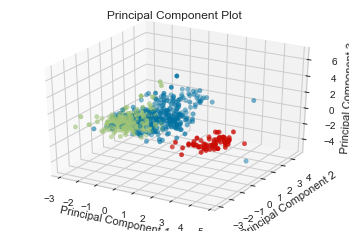

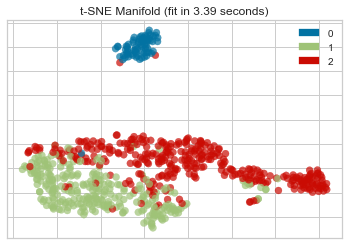

In [52]:
### Feature Visualization and Analysis

LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'g',
                   2 : 'b'}

label_color = [LABEL_COLOR_MAP[l] for l in y_train]

visualizer = PCADecomposition(scale=True, color=label_color, proj_dim=3)
visualizer.fit(X_pc_tr, y_train)
visualizer.transform(X_pc_tr)
visualizer.poof()


from yellowbrick.features.manifold import Manifold

visualizer = Manifold(manifold='tsne', target='discrete')
visualizer.fit_transform(X_pc_tr,y_train)
visualizer.poof()

In [36]:
## Confusion matrix and classification report for the NEW DATA

y_pred_new = grid.predict(X_pc_td)
display(grid.score(X_pc_td, y_testd))
confusion_Mn = confusion_matrix(y_testd, y_pred_new)
print(confusion_Mn)
print(classification_report(y_testd, y_pred_new))




0.8661219358893778

[[  40    0    1]
 [   0   43    7]
 [   1  204 1295]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.17      0.86      0.29        50
           2       0.99      0.86      0.92      1500

   micro avg       0.87      0.87      0.87      1591
   macro avg       0.71      0.90      0.73      1591
weighted avg       0.97      0.87      0.91      1591



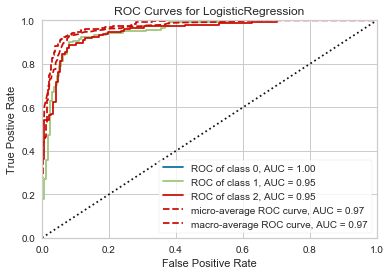

In [15]:
#Original DATA

from yellowbrick.classifier import ROCAUC
# Specify the classes of the target
classes = ["0", "1","2"]
# Instantiate the visualizer with the classification model
visualizerRO = ROCAUC(LogisticRegression(multi_class="auto", solver="newton-cg"), classes=classes)
visualizerRO.fit(X_pc_tr, y_train)  # Fit the training data to the visualizer
visualizerRO.score(X_pc_te, y_test)  # Evaluate the model on the test data
visualizerRO.poof()       

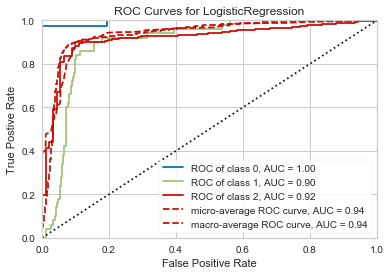

In [16]:
##### With NEW DATA #####

# Specify the classes of the target
classes = ["0", "1","2"]
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(LogisticRegression(multi_class="auto", solver="newton-cg"), classes=classes)
visualizer.fit(X_pc_tr, y_train)  # Fit the training data to the visualizer
visualizer.score(X_pc_td, y_testd)  # Evaluate the model on the test data
visualizer.poof()       

,MIMAT0003326,MIMAT0023712,MIMAT0005582,MIMAT0027468,MIMAT0027562,MIMAT0019849
0,11.723,11.241,10.415,10.596,4.740,7.443
1,11.984,11.041,10.755,10.902,6.371,7.068
2,11.283,11.721,11.142,10.962,6.483,7.848
3,12.687,11.478,10.833,10.964,7.194,7.544
4,11.560,12.039,11.052,11.836,4.715,7.258


,MIMAT0003326,MIMAT0023712,MIMAT0005582,MIMAT0027468,MIMAT0027562,MIMAT0019849
0,11.723,11.241,10.415,10.596,4.740,7.443
1,11.984,11.041,10.755,10.902,6.371,7.068
2,11.283,11.721,11.142,10.962,6.483,7.848
3,12.687,11.478,10.833,10.964,7.194,7.544
4,11.560,12.039,11.052,11.836,4.715,7.258


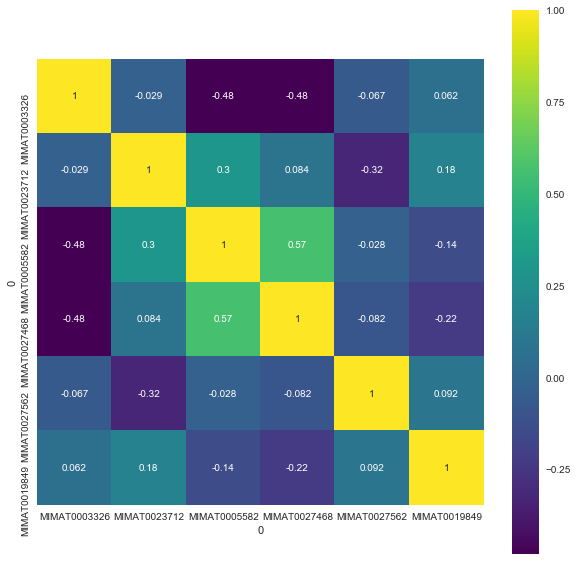

In [17]:

#print(np.sort(importances)[-50:])
import seaborn as sns

X_pc_tr2 = X_pc_tr.reset_index()
X_pc_tr3 = X_pc_tr2.drop('index',axis=1)
display(X_pc_tr3.head())
X_pc_tr4=X_pc_tr3.apply(pd.to_numeric,errors='coerce')
display(X_pc_tr4.head())

correlation = X_pc_tr4.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')



In [27]:
df8[imp_fet].head()

,MIMAT0003326,MIMAT0023712,MIMAT0005582,MIMAT0027468,MIMAT0027562,MIMAT0019849
1,12.932,11.397,10.993,11.585,-0.636,6.083
2,13.379,11.458,10.931,11.406,5.714,6.265
3,12.561,11.367,11.072,12.065,5.088,5.790
4,12.955,11.537,10.671,11.165,5.999,7.342
5,12.884,11.287,10.742,11.215,7.150,8.055


In [34]:
test.head()

,MIMAT0003326,MIMAT0023712,MIMAT0005582,MIMAT0027468,MIMAT0027562,MIMAT0019849
1,12.932,11.397,10.993,11.585,-0.636,6.083
2,13.379,11.458,10.931,11.406,5.714,6.265
3,12.561,11.367,11.072,12.065,5.088,5.790
4,12.955,11.537,10.671,11.165,5.999,7.342
5,12.884,11.287,10.742,11.215,7.150,8.055


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

#test = df8[imp_fet].iloc[:100,:]
#sns.pairplot(test)
#plt.show()

In [38]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

model = LogisticRegression(random_state=1)

model.fit(X_pc_tr, y_train)

expected = y_test
predicted = model.predict(X_pc_te)

print('Linear Regression model')
print('Mean Squared Error: %0.3f' % mse(expected, predicted))



Linear Regression model
Mean Squared Error: 0.144


In [39]:
expected = y_testd
predicted = model.predict(X_pc_td)

print('Linear Regression model')
print('Mean Squared Error: %0.3f' % mse(expected, predicted))


Linear Regression model
Mean Squared Error: 0.154


{'n_neighbors': 9}

0.9117647058823529

0.9143835616438356

[[ 30   0   0]
 [  0 109   9]
 [  0  16 128]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.87      0.92      0.90       118
           2       0.93      0.89      0.91       144

   micro avg       0.91      0.91      0.91       292
   macro avg       0.94      0.94      0.94       292
weighted avg       0.92      0.91      0.91       292



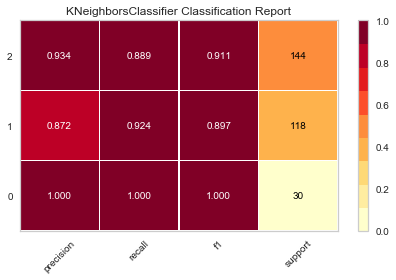

In [40]:
## B) K-NearestNeighbor Classifier

grid_params = {'n_neighbors': np.arange(1,25)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,grid_params,cv=10)
knn_cv.fit(X_pc_tr,y_train)

display(knn_cv.best_params_)
display(knn_cv.best_score_)
            
#Confusion matrix and classification report

y_pred_knn = knn_cv.predict(X_pc_te)
display(knn_cv.score(X_pc_te, y_test))

confusion_M2 = confusion_matrix(y_test, y_pred_knn)
print(confusion_M2)
print(classification_report(y_test, y_pred_knn))


knn2 = KNeighborsClassifier(n_neighbors=9)
visualizerKN = ClassificationReport(knn2, support=True)

visualizerKN.fit(X_pc_tr, y_train)  # Fit the visualizer and the model
visualizerKN.score(X_pc_te, y_test)  # Evaluate the model on the test data
visualizerKN.poof()                 # Draw/show/poof the data

0.8359522313010685

[[  40    0    1]
 [   0   45    5]
 [   1  254 1245]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.15      0.90      0.26        50
           2       1.00      0.83      0.91      1500

   micro avg       0.84      0.84      0.84      1591
   macro avg       0.71      0.90      0.71      1591
weighted avg       0.97      0.84      0.89      1591



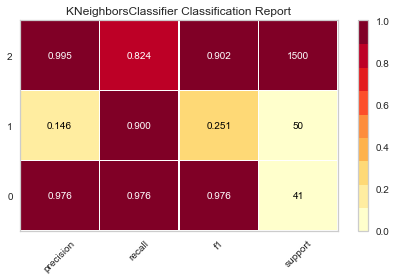

In [41]:
#Confusion matrix and classification report for the NEW DATA


y_pred_knn2 = knn_cv.predict(X_pc_td)
display(knn_cv.score(X_pc_td, y_testd))

confusion_M = confusion_matrix(y_testd, y_pred_knn2)
print(confusion_M)
print(classification_report(y_testd, y_pred_knn2))


knn22 = KNeighborsClassifier()
visualizerKN = ClassificationReport(knn22, support=True)

visualizerKN.fit(X_pc_tr, y_train)  # Fit the visualizer and the model
visualizerKN.score(X_pc_td, y_testd)  # Evaluate the model on the test data
visualizerKN.poof()  

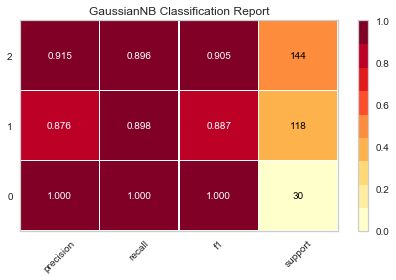

In [42]:
## C) GaussianNB Classifier and visualizer
#Assumes independence between attributes 

bayes = GaussianNB()
visualizerGNB = ClassificationReport(bayes, support=True)

visualizerGNB.fit(X_pc_tr, y_train)  # Fit the visualizer and the model
visualizerGNB.score(X_pc_te, y_test)  # Evaluate the model on the test data
visualizerGNB.poof()                 # Draw/show/poof the data

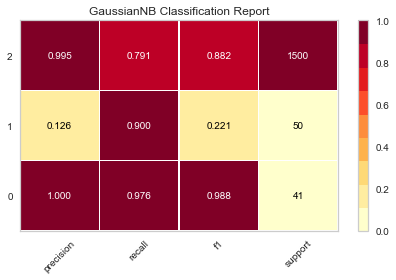

In [21]:
### With NEw DATA
bayes = GaussianNB()
visualizerGNB = ClassificationReport(bayes, support=True)

visualizerGNB.fit(X_pc_tr, y_train)  # Fit the visualizer and the model
visualizerGNB.score(X_pc_td, y_testd)  # Evaluate the model on the test data
visualizerGNB.poof()                 # Draw/show/poof the data

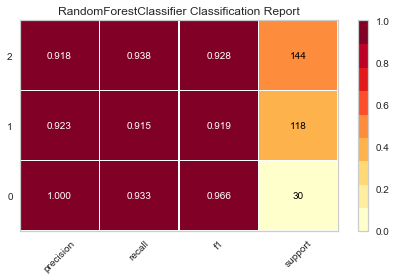

In [50]:
##https://github.com/georgetown-analytics/machine-learning/blob/master/notebook/Wheat%20Classification.ipynb

### D)Random Forest Classifier and visualizer

rf = RandomForestClassifier()
visualizerRF = ClassificationReport(rf, support=True)  

visualizerRF.fit(X_pc_tr,y_train)  # Fit the visualizer and the model
visualizerRF.score(X_pc_te,y_test)  # Evaluate the model on the test data
visualizerRF.poof()                 # Draw/show/poof the data


#rf.fit(X_pc_tr,y_train)
#expected  = y_test
#predicted = rf.predict(X_pc_te)       
#display(metrics.precision_score(expected, predicted, average='weighted'))
#display(metrics.recall_score(expected, predicted,average='weighted'))
#display(metrics.accuracy_score(expected, predicted))
#display(metrics.f1_score(expected, predicted, average='weighted'))



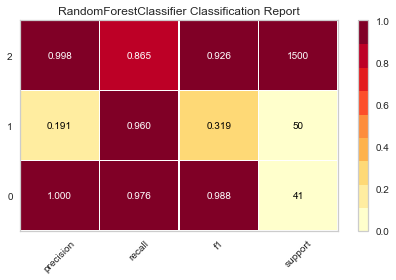

In [51]:
### With NEW DATA ###
rf = RandomForestClassifier()
visualizerRF = ClassificationReport(rf, support=True)  

visualizerRF.fit(X_pc_tr,y_train)  # Fit the visualizer and the model
visualizerRF.score(X_pc_td,y_testd)  # Evaluate the model on the test data
visualizerRF.poof() 

In [ ]:
#ClassPredictionError
#The Yellowbrick ClassPredictionError plot is a twist on other and sometimes more familiar classification model 
#diagnostic tools like the Confusion Matrix and Classification Report. Like the Classification Report, 
#this plot shows the support (number of training samples) for each class in the fitted classification 
#model as a stacked bar chart. Each bar is segmented to show the proportion of predictions 
#(including false negatives and false positives, like a Confusion Matrix) for each class. 
#You can use a ClassPredictionError to visualize which classes your classifier is having a particularly difficult 
#time with, and more importantly, what incorrect answers it is giving on a per-class basis. 
#This can often enable you to better understand strengths and weaknesses of different models and particular 
#challenges unique to your dataset.
#The class prediction error chart provides a way to quickly understand how good 
#your classifier is at predicting the right classes.

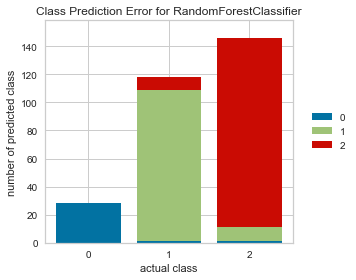

In [24]:
### D)Random Forest Classifier and visualizer 2


visualizer2 = ClassPredictionError(RandomForestClassifier())

# Fit the training data to the visualizer
visualizer2.fit(X_pc_tr, y_train)

# Evaluate the model on the test data
visualizer2.score(X_pc_te, y_test)

# Draw visualization
visualizer2.poof()

In [28]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import precision_score


model = ExtraTreesClassifier(n_estimators=100)
model.fit(X_pc_tr, y_train)

expected = y_test
predicted = model.predict(X_pc_te)

print('Extra Trees Classifier')
print('Mean Squared Error: %0.3f' % mse(expected, predicted))
print('Coefficient of Determination: %0.3f' % r2_score(expected, predicted))
print('Precision Score: ') 
print(precision_score(expected, predicted, average=None))

Extra Trees Classifier
Mean Squared Error: 0.086
Coefficient of Determination: 0.807
Precision Score: 
[1.         0.90434783 0.9047619 ]


In [ ]:
############ IGNORE STUFF AFTER THIS POINT ################

In [ ]:
###########################################################

In [ ]:
###########################################################

In [29]:
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.model_selection import StratifiedKFold
#from yellowbrick.model_selection import CVScores

# Create a cross-validation strategy
#cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
#model = MultinomialNB()
#visualizer = CVScores(model, cv=cv, scoring='f1_weighted')
#visualizer.fit(X_pc_tr, y_train)
#visualizer.poof()

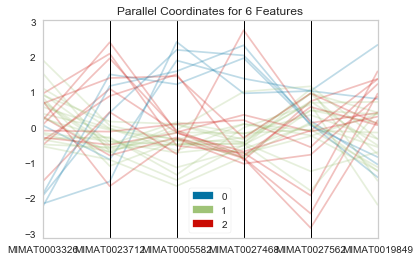

In [29]:
from yellowbrick.features import ParallelCoordinates

classes = [0, 1, 2]

visualizer = ParallelCoordinates(
    classes=classes, features=X_pc_tr.columns, 
    #features,
    normalize='standard', 
    sample=0.05, shuffle=True
)

visualizer.fit(X_pc_tr, y_train)
visualizer.transform(X_pc_tr)

visualizer.poof()

In [94]:
type(X)
#X_pc_tr.column.dtype
XX=X.astype('int')
yy=y.astype('int')





ValueError: invalid literal for int() with base 10: '11.723'

KeyError: 0

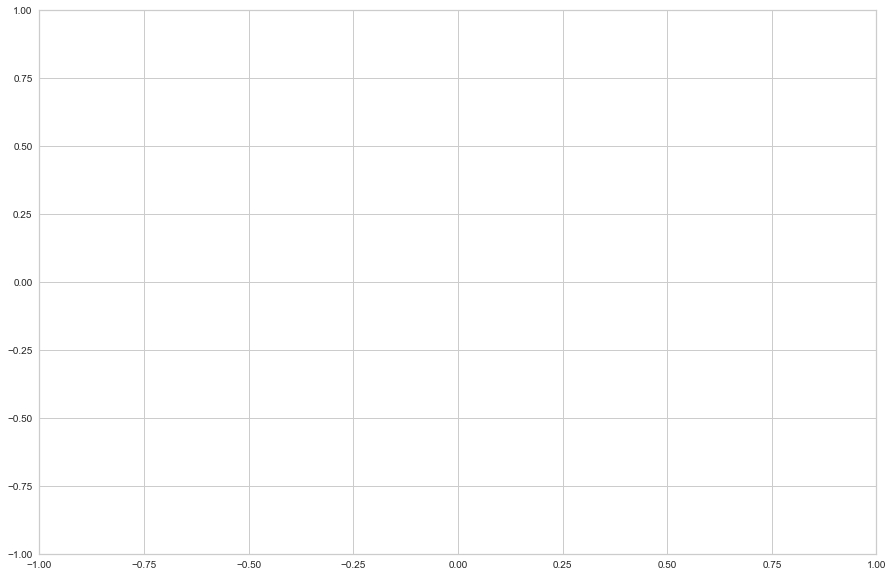

In [310]:

from yellowbrick.features import RadViz
d = y_train.apply(pd.to_numeric,errors='coerce')
s = X_pc_tr4

# Specify the target classes
classes = [0, 1, 2]

# Instantiate the visualizer
visualizer = RadViz(size=(1080, 720))

visualizer.fit(s, d)           # Fit the data to the visualizer
visualizer.transform(s)        # Transform the data
visualizer.poof()              # Draw/show/poof the data

In [179]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=22, random_state=42)
x_tred = svd.fit_transform(X_train)
x_tered  = svd.transform(X_test)
print(svd.explained_variance_ratio_.sum())
print(x_tred.shape)
print(x_tered.shape)
print(type(x_tred))
print(type(x_tered))
x_tred2 = pd.DataFrame(x_tred)
x_tered2 = pd.DataFrame(x_tered)
print(type(x_tred2))
print(type(x_tered2))

0.48530509843283476
(729, 22)
(243, 22)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [71]:
# Code adapted from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


def silhouette_plot(X, range_n_clusters = range(2,6, 1)):

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1
        ax1.set_xlim([-.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors)

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1],
                    marker='o', c="white", alpha=1, s=200)

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2532013393427366


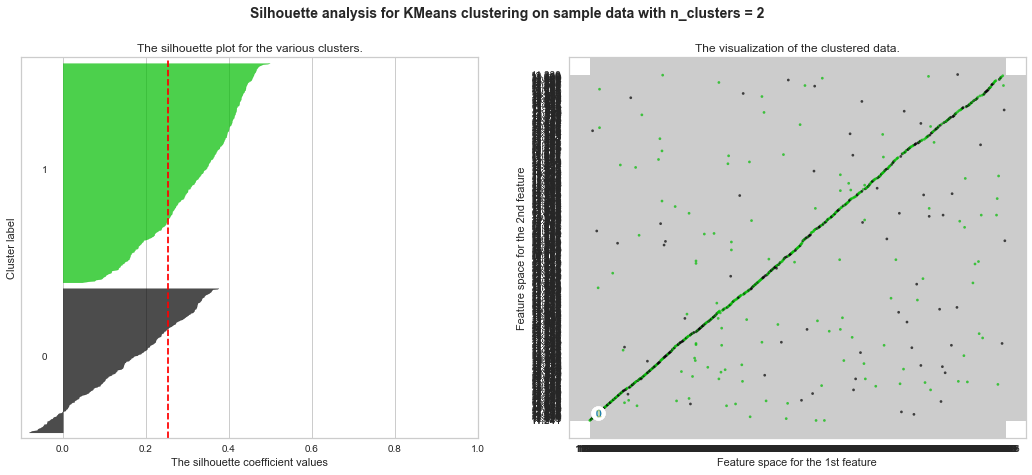

For n_clusters = 3 The average silhouette_score is : 0.16476490987747958


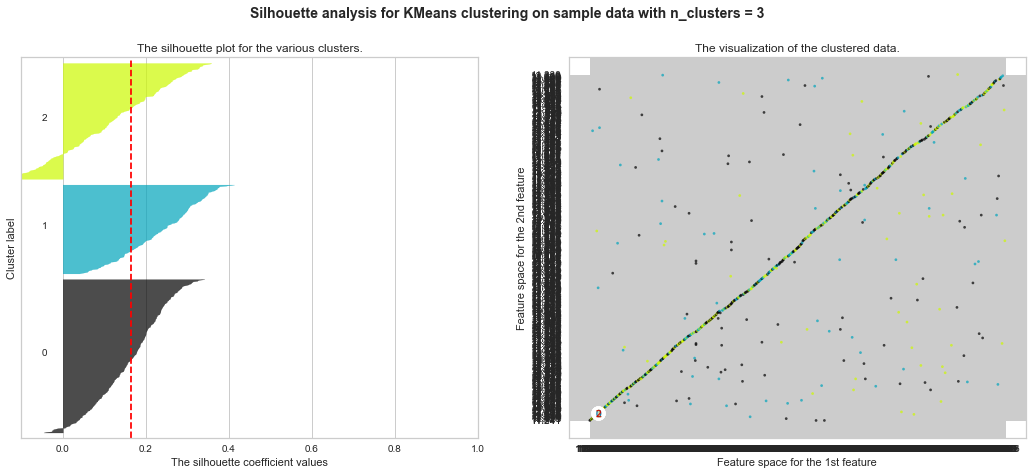

For n_clusters = 4 The average silhouette_score is : 0.1759747893395277


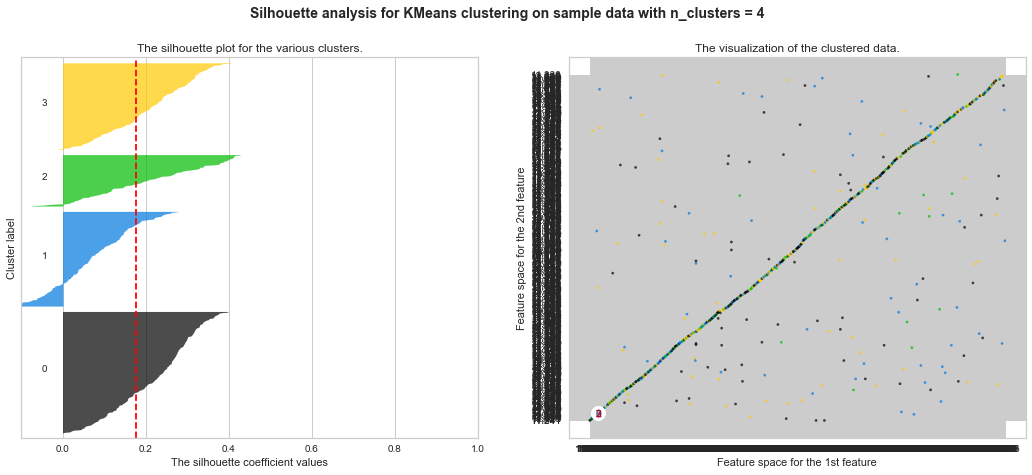

For n_clusters = 5 The average silhouette_score is : 0.18618017286741442


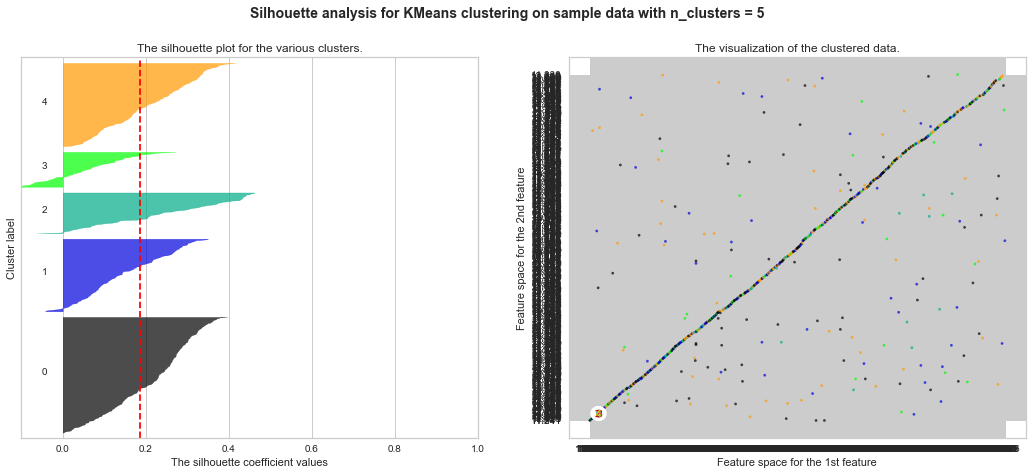

In [72]:
#xx = pd.DataFrame(X_pc_tr)
silhouette_plot(X_pc_tr)

In [74]:
X_pc_tr.shape

(680, 15)

In [128]:
from sklearn.discriminant_analysis
lda = LDA(n_components=2)
new_features = lda.fit(features, labels).transform(features)
print(new_features)

NameError: name 'LDA' is not defined

In [127]:
new_features[:10]

NameError: name 'new_features' is not defined

In [166]:
clf = RandomForestClassifier() #n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)
feat_imps = np.sort(clf.feature_importances_)
feat_imps[-10:]

array([0.01486296, 0.01516597, 0.01682747, 0.01742405, 0.01767468,
       0.0197692 , 0.0216427 , 0.02165882, 0.02303424, 0.02954323])

(array([62., 12.,  8.,  5.,  5.,  3.,  1.,  3.,  0.,  1.]),
 array([ 2.50327805,  5.20727277,  7.91126749, 10.6152622 , 13.31925692,
        16.02325163, 18.72724635, 21.43124106, 24.13523578, 26.8392305 ,
        29.54322521]),
 <a list of 10 Patch objects>)

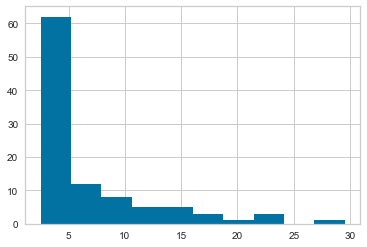

In [174]:
import matplotlib.pyplot as plt 
plt.hist(feat_imps[-100:]*1000)
#plt.boxplot(feat_imps[-775:]*100)